In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense, BatchNormalization
from keras import backend as K
import os
import numpy as np
import pandas as pd

In [2]:
train = "chest_xray/train"
test = "chest_xray/test"
val = "chest_xray/val"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, rotation_range = 30,
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 5216 images belonging to 2 classes.


In [5]:
test_gen = train_datagen.flow_from_directory(test,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 624 images belonging to 2 classes.


In [6]:
val_gen = train_datagen.flow_from_directory(val,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 16 images belonging to 2 classes.


In [7]:
model = Sequential()
# The number of filters are 32 and the kernal_size is (3,3)
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["acc"])

In [9]:
history = model.fit_generator(train_gen,
                         steps_per_epoch = 163,
                         epochs = 20,
                         validation_data = val_gen,
                         validation_steps = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
163/163 [==============================] - 404s 2s/step - loss: 0.5012 - acc: 0.7644 - val_loss: 0.5860 - val_acc: 0.9375
Epoch 2/20
163/163 [==============================] - 173s 1s/step - loss: 0.3387 - acc: 0.8545 - val_loss: 1.4147 - val_acc: 0.5000
Epoch 3/20
163/163 [==============================] - 173s 1s/step - loss: 0.2889 - acc: 0.8786 - val_loss: 0.3852 - val_acc: 0.8125
Epoch 4/20
163/163 [==============================] - 172s 1s/step - loss: 0.2410 - acc: 0.8995 - val_loss: 0.5397 - val_acc: 0.8125
Epoch 5/20
163/163 [==============================] - 172s 1s/step - loss: 0.2146 - acc: 0.9183 - val_loss: 0.8247 - val_acc: 0.6250
Epoch 6/20
163/163 [==============================] - 172s 1s/step - loss: 0.2078 - acc: 0.9151 - val_loss: 0.4537 - val_acc: 0.8125
Epoch 7/20
163/163 [==============================] - 173s 1s/step - loss: 0.1963 - acc: 0.9191 - val_loss: 0.7026 - val_acc: 

In [10]:
#Accuracy of test data.
test_acc = model.evaluate_generator(test_gen,624/32)
print("\nAccuracy:"+" %.2f%%" % ( test_acc[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

Accuracy: 83.01%


In [11]:
model.save("pneumonia.h5")

In [12]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [14]:
model = load_model("pneumonia.h5")

In [15]:
from skimage.transform import resize

In [16]:
def detect(frame):
    try:
        img = resize(frame, (150,150))
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        print(prediction)
        prediction = prediction > 0.5
        print(prediction)
        s = "PNEUMONIA" if (prediction[0][0]) else "NORMAL"
        return (s)
    except AttributeError:
        print("SHAPE NOT FOUND")

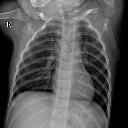

In [17]:
image.load_img("test1.jpeg",target_size = (128,128))

In [18]:
frame = cv2.imread("test1.jpeg")
data = detect(frame)
data

[[0.23195472]]
[[False]]


'NORMAL'

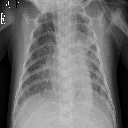

In [19]:
image.load_img("test2.jpeg",target_size = (128,128))

In [20]:
frame = cv2.imread("test2.jpeg")
data = detect(frame)
data

[[0.9963815]]
[[ True]]


'PNEUMONIA'